In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.optimize import minimize_scalar, minimize
from time import time
import sys
sys.path.append('..')

In [2]:
from osd import Problem
from osd.components import AsymmetricNoise, GaussNoise, LaplaceNoise, SmoothSecondDifference, SmoothFirstDifference
from osd.utilities import progress
import cvxpy as cvx

In [3]:
def draw_asymlaplace(mu=0, b=1, k=1, size=1):
    U = np.random.uniform(-k, 1/k, size)
    X = mu - (1 / (b * np.sign(U) * k ** 2)) * np.log(1 - U * np.sign(U) * k ** np.sign(U))
    return X
def draw_laplace(mu=0, b=1, size=1):
    U = np.random.uniform(-0.5, 0.5, size)
    X = mu - b * np.sign(U) * np.log(1 - 2 * np.abs(U))
    return X

# Simple Signal

In [4]:
np.random.seed(42)
t = np.linspace(0, 1000, 3000)
# signal1 = (np.sin(2 * np.pi * t * 5 / (500.))
#            + np.cos(2 * np.pi * t * 7 / (550.) + np.sin(2 * np.pi * t * 13 / (550.))))
signal1 = np.sin(2 * np.pi * t * 1 / (500.))
y = signal1 + draw_asymlaplace(b=.2, k=5, size=len(signal1))

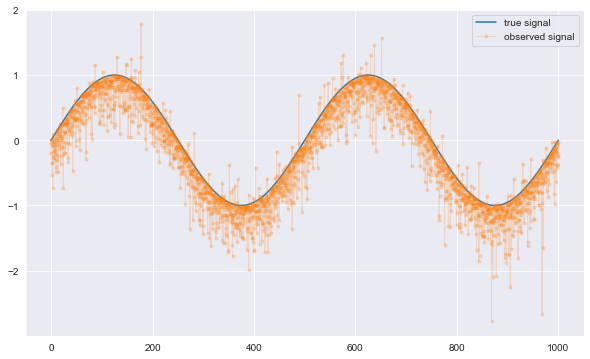

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, y, alpha=0.2, label='observed signal', linewidth=1, marker='.')
plt.legend()
plt.show()

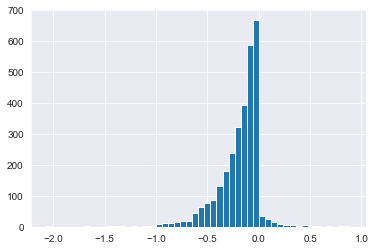

In [6]:
plt.hist(draw_asymlaplace(b=.2, k=5, size=len(signal1)), bins=50);

## First-Order Difference Smoothing

In [7]:
problem = Problem(data=y, components=[GaussNoise, SmoothFirstDifference])
problem.optimize_weights(solver='MOSEK')
gauss_est = problem.estimates[1]
problem = Problem(data=y, components=[AsymmetricNoise(tau=.8), SmoothFirstDifference])
problem.optimize_weights(solver='MOSEK')
# problem.optimize_parameters(solver='MOSEK')
# problem.optimize_weights(solver='MOSEK')
# problem.optimize_parameters(solver='MOSEK')
asym_est = problem.estimates[1]

In [8]:
problem.parameters[0]['tau'].value

0.8

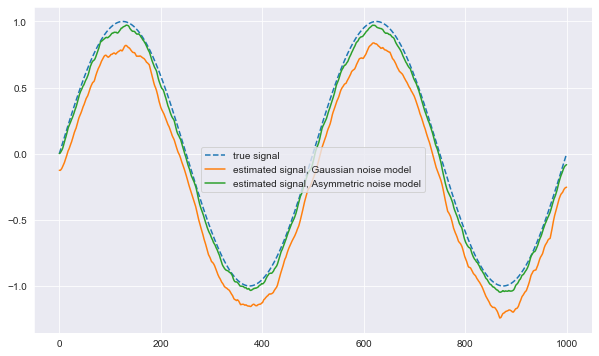

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal', ls='--')
plt.plot(t, gauss_est, label='estimated signal, Gaussian noise model')
plt.plot(t, asym_est, label='estimated signal, Asymmetric noise model')
plt.legend()
plt.show()

In [10]:
problem.holdout_validation(solver='MOSEK', seed=42)

60.48296715739481

## Second-Order Difference Smoothing

In [11]:
problem = Problem(data=y, components=[GaussNoise, SmoothSecondDifference])
problem.optimize_weights(solver='MOSEK')
gauss_est = problem.estimates[1]

In [12]:
problem = Problem(data=y, components=[AsymmetricNoise(tau=.8), SmoothSecondDifference])
problem.optimize_weights(solver='MOSEK')
asym_est = problem.estimates[1]

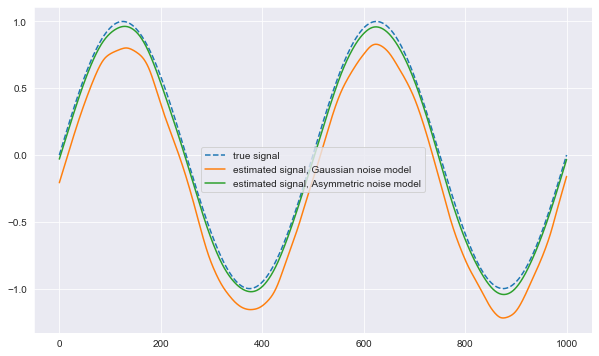

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal', ls='--')
plt.plot(t, gauss_est, label='estimated signal, Gaussian noise model')
plt.plot(t, asym_est, label='estimated signal, Asymmetric noise model')
plt.legend()
plt.show()

In [14]:
problem.holdout_validation(solver='MOSEK', seed=42)

60.85655417455787

# More Complex Signal

In [15]:
np.random.seed(42)
t = np.linspace(0, 500, 3000)
signal1 = (np.sin(2 * np.pi * t * 5 / (500.))
           + np.cos(2 * np.pi * t * 7 / (550.) + np.sin(2 * np.pi * t * 13 / (550.))))
y = signal1 + draw_asymlaplace(b=.2, k=5, size=len(signal1))

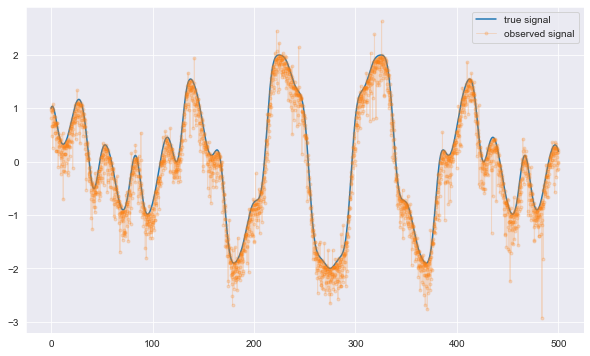

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, y, alpha=0.2, label='observed signal', linewidth=1, marker='.')
plt.legend()
plt.show()

## First-Order Difference Smoothing

In [17]:
problem = Problem(data=y, components=[GaussNoise, SmoothFirstDifference])
problem.optimize_weights(solver='MOSEK')
gauss_est = problem.estimates[1]
problem = Problem(data=y, components=[AsymmetricNoise(tau=.8), SmoothFirstDifference])
problem.optimize_weights(solver='MOSEK')
asym_est = problem.estimates[1]

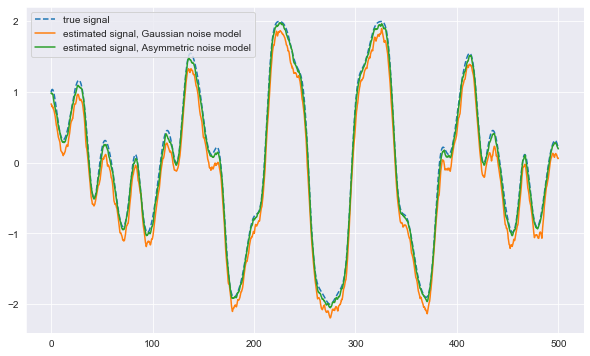

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal', ls='--')
plt.plot(t, gauss_est, label='estimated signal, Gaussian noise model')
plt.plot(t, asym_est, label='estimated signal, Asymmetric noise model')
plt.legend()
plt.show()

In [19]:
problem.holdout_validation(solver='MOSEK', seed=42)

59.651044264693645

## Second-Order Difference Smoothing

In [20]:
problem = Problem(data=y, components=[GaussNoise, SmoothSecondDifference])
problem.optimize_weights(solver='MOSEK')
gauss_est = problem.estimates[1]
problem = Problem(data=y, components=[AsymmetricNoise(tau=.8), SmoothSecondDifference])
problem.optimize_weights(solver='MOSEK')
asym_est = problem.estimates[1]

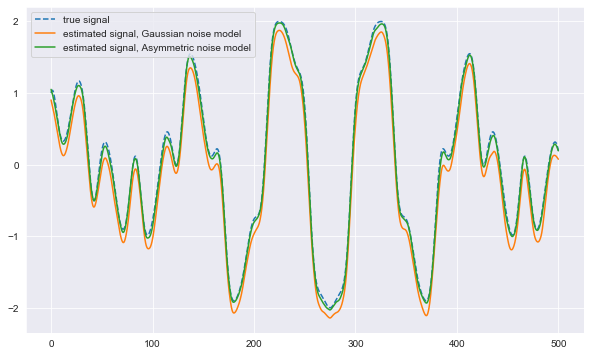

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal', ls='--')
plt.plot(t, gauss_est, label='estimated signal, Gaussian noise model')
plt.plot(t, asym_est, label='estimated signal, Asymmetric noise model')
plt.legend()
plt.show()

In [22]:
problem.holdout_validation(solver='MOSEK', seed=42)

60.2394892236234

In [23]:
problem.parameters

{0: {'tau': Parameter((), nonneg=True)}}